# Test Dataset Preparation and 2016 NCAA Preparation

In [ ]:
%install_ext https://raw.githubusercontent.com/rasbt/watermark/master/watermark.py
%load_ext watermark

In [2]:
%watermark -a 'Nan(Miya)Wang' -u -d -t -z -v --python

Nan(Miya)Wang 
last updated: 2016-03-20 12:05:11 Eastern Daylight Time

CPython 2.7.10
IPython 4.0.1


* The best Partition is 50%-50% by plotting learning Rate. 
* The model behaves more assertive on 'Gonna Win' teams 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation
from IPython.display import Image
from IPython import display
from sklearn.metrics import classification_report

# Test Dataset Preparation

In [ ]:
test = pd.read_csv('March_Madness_test.csv',index_col = 'game_id')
test.columns.tolist()
test = test.reindex_axis(sorted(test.columns), axis=1)
dataframe_tonorm = test
test.columns.tolist()

In [3]:
dataframe_tonorm = test
min_max_scaler = preprocessing.MinMaxScaler()
dataframe_tonorm = min_max_scaler.fit_transform(dataframe_tonorm)
dataframe_tonorm = pd.DataFrame(dataframe_tonorm,columns = ['div_rpi_norm',
 'div_seed_norm',
 'team1_adjde',
 'team1_adjoe',
 'team1_blockpct',
 'team1_distance',
 'team1_fg3pct',
 'team1_oppfg2pct',
 'team1_oppfg3pct',
 'team2_adjde',
 'team2_adjoe',
 'team2_blockpct',
 'team2_distance',
 'team2_fg3pct',
 'team2_oppfg2pct',
 'team2_oppfg3pct'])
dataframe_tonorm = dataframe_tonorm.drop('div_seed_norm',1)
dataframe_tonorm = dataframe_tonorm.drop('div_rpi_norm',1)
dataframe_tonorm = dataframe_tonorm.set_index(test.index)
dataframe_tonorm.head()

,team1_adjde,team1_adjoe,team1_blockpct,team1_distance,team1_fg3pct,team1_oppfg2pct,team1_oppfg3pct,team2_adjde,team2_adjoe,team2_blockpct,team2_distance,team2_fg3pct,team2_oppfg2pct,team2_oppfg3pct
game_id,,,,,,,,,,,,,,
2016-1314-1462,0.167699,0.88798,0.573781,0.072082,0.040121,0.234899,0.785019,0.259139,0.743083,0.307060,0.111179,0.422823,0.624907,0.289197
2016-1314-1452,0.167699,0.88798,0.573781,0.072082,0.040121,0.234899,0.785019,0.104759,0.702969,0.249274,0.048679,0.157667,0.604526,0.481955
2016-1314-1246,0.167699,0.88798,0.573781,0.072082,0.040121,0.234899,0.785019,0.373202,1.000000,0.832992,0.113849,0.494048,0.176859,0.456512
2016-1314-1231,0.167699,0.88798,0.573781,0.072082,0.040121,0.234899,0.785019,0.363527,0.869085,0.435992,0.139241,0.848661,0.646756,0.600607
2016-1314-1323,0.167699,0.88798,0.573781,0.072082,0.040121,0.234899,0.785019,0.570319,0.822847,0.431090,0.137319,0.481456,0.389187,0.956791


In [ ]:
dataframe_tonorm['div_seed_norm']=test.div_seed_norm
dataframe_tonorm['div_rpi_norm']=test.div_rpi_norm
dataframe_tonorm.columns.tolist()

In [5]:
dataframe_tonorm['div_adjde'] = dataframe_tonorm.team1_adjde - dataframe_tonorm.team2_adjde
dataframe_tonorm['div_adjoe'] = dataframe_tonorm.team1_adjoe - dataframe_tonorm.team2_adjoe
dataframe_tonorm['div_blockpct'] = dataframe_tonorm.team1_blockpct - dataframe_tonorm.team2_blockpct
dataframe_tonorm['div_distance'] = dataframe_tonorm.team1_distance - dataframe_tonorm.team2_distance
dataframe_tonorm['div_fg3pct'] = dataframe_tonorm.team1_fg3pct - dataframe_tonorm.team2_fg3pct
dataframe_tonorm['div_oppfg2pct'] = dataframe_tonorm.team1_oppfg2pct - dataframe_tonorm.team2_oppfg2pct
dataframe_tonorm['div_oppfg3pct'] = dataframe_tonorm.team1_oppfg3pct - dataframe_tonorm.team2_oppfg3pct

In [ ]:
dataframe_tonorm.columns.tolist()

In [6]:
test_final = dataframe_tonorm[['div_seed_norm',
 'div_rpi_norm',
 'div_adjde',
 'div_adjoe',
 'div_blockpct',
 'div_distance',
 'div_oppfg3pct',
 'div_fg3pct',
 'div_oppfg2pct']]
test_final= test_final.reindex_axis(sorted(test_final.columns), axis=1)
test_final.head()

,div_adjde,div_adjoe,div_blockpct,div_distance,div_fg3pct,div_oppfg2pct,div_oppfg3pct,div_rpi_norm,div_seed_norm
game_id,,,,,,,,,
2016-1314-1462,-0.091440,0.144897,0.266722,-0.039097,-0.382702,-0.390008,0.495822,0.000461,0.06
2016-1314-1452,0.062940,0.185011,0.324507,0.023403,-0.117547,-0.369627,0.303063,0.001075,0.12
2016-1314-1246,-0.205502,-0.112020,-0.259211,-0.041768,-0.453928,0.058040,0.328507,0.001458,0.18
2016-1314-1231,-0.195827,0.018895,0.137789,-0.067160,-0.808541,-0.411857,0.184412,0.003300,0.24
2016-1314-1323,-0.402620,0.065133,0.142691,-0.065237,-0.441335,-0.154288,-0.171772,0.004298,0.30


# Train Dataset 

In [24]:
NCAA_new = pd.read_csv("train.csv",index_col = "game_id")
NCAA_new = NCAA_new.reindex_axis(sorted(NCAA_new.columns), axis=1)
NCAA_new = NCAA_new.sort_index()
X_new = NCAA_new.iloc[:,:-1]
Y_new = NCAA_new.iloc[:,-1]
X_new,Y_new = shuffle(X_new,Y_new,random_state = 0)

In [9]:
len(NCAA_new)

1625

# Model Performance of Different Training Size

In [ ]:
from __future__ import division
list_i = []
list_log_loss = []
list_log_loss_valid = []
for i in range(500,880,50):
    list_i.append(i/1625)
    X_new_2015= NCAA_new.iloc[:i,:-1]
    Y_new_2015 = NCAA_new.iloc[:i,-1]
    X_new_2015,Y_new_2015 = shuffle(X_new_2015,Y_new_2015,random_state = 0)
    X_test_2015 = NCAA_new.iloc[i:(i+round((1625-i)/2)),:-1]
    Y_test_2015 = NCAA_new.iloc[i:(i+round((1625-i)/2)),-1]
    X_validation_2015 = NCAA_new.iloc[(i+round((1625-i)/2)):,:-1]
    Y_validation_2015 = NCAA_new.iloc[(i+round((1625-i)/2)):,-1]
    forest_9_new = RandomForestClassifier(n_estimators = 300,max_features = 2,max_depth = None)
    forest_9_new.fit(X_new_2015,Y_new_2015)
    list_log_loss.append(log_loss(Y_test_2015,forest_9_new.predict_proba(X_test_2015)))
    list_log_loss_valid.append(log_loss(Y_validation_2015,forest_9_new.predict_proba(X_validation_2015)))
plt.gca().set_color_cycle(['red', 'green','blue'])

plt.plot(list_i, list_log_loss,marker = 's')
plt.plot(list_i, list_log_loss_valid,marker = 'o')
plt.plot(list_i, [0.48]*len(list_log_loss_valid),linestyle = '--')


plt.legend(['Traning log loss', 'Validation log loss','Desired log loss'], loc='upper left')
plt.xlabel('Percentage of training samples')
plt.ylabel('Log loss')
plt.show()

## Learning Curve

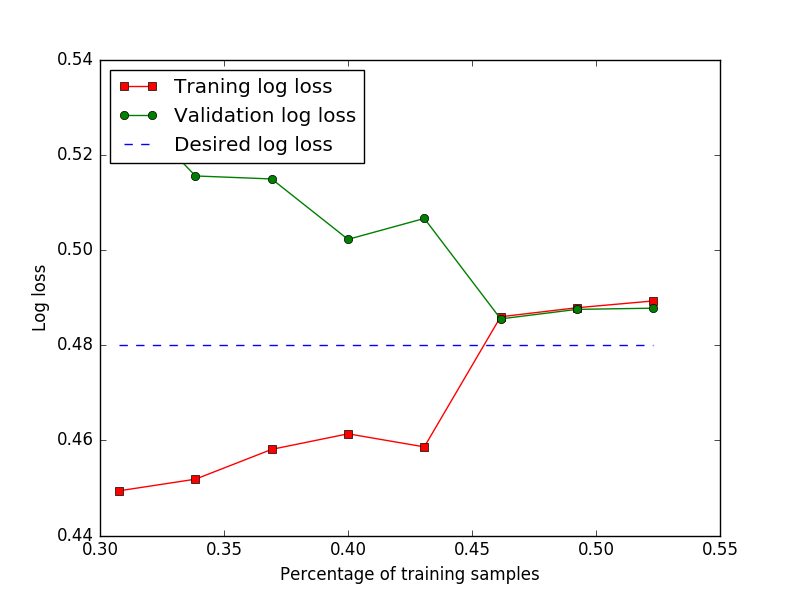

In [3]:
Image('figure_14.png')

In [48]:
Pred_2015_RF = map(lambda x:x[1],forest_9_new.predict_proba(X_test_2015))
pd.DataFrame(Pred_2015_RF).hist()
plt.show()

### Predicted Prob Distribution for 2015
> Model behaves assertive on both 'Gonna Win' teams and 'Gonna Lose' teams.

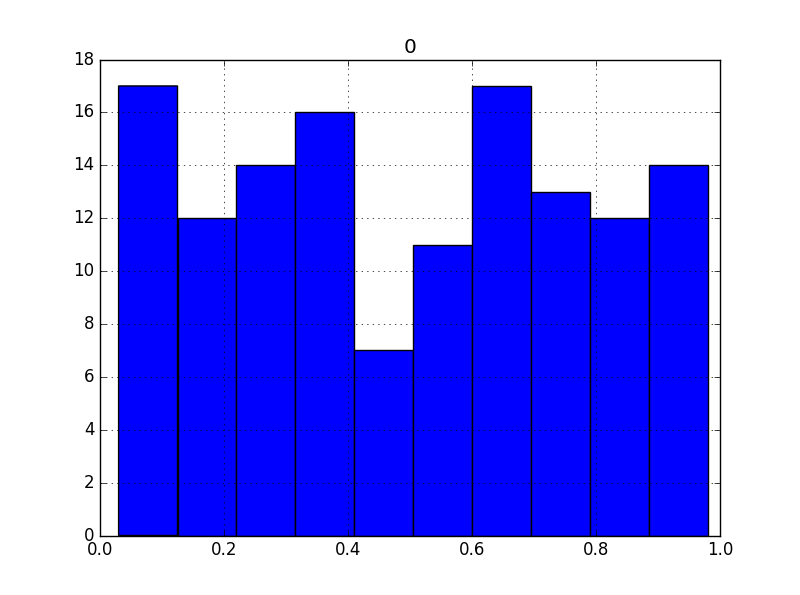

In [27]:
Image('figure_13.png')

In [49]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02,
                                max_depth=3, random_state=0)
GB.fit(X_new_2015,Y_new_2015)
log_loss(Y_test_2015,GB.predict_proba(X_test_2015))
from __future__ import division
list_i = []
list_log_loss = []
for i in range(500,1500,100):
    list_i.append(i/1625)
    X_new_2015= NCAA_new.iloc[:i,:-1]
    Y_new_2015 = NCAA_new.iloc[:i,-1]
    X_new_2015,Y_new_2015 = shuffle(X_new_2015,Y_new_2015,random_state = 0)
    X_test_2015 = NCAA_new.iloc[i:,:-1]
    Y_test_2015 = NCAA_new.iloc[i:,-1]
    GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.02,
                                max_depth=3, random_state=0)
    GB.fit(X_new_2015,Y_new_2015)
    list_log_loss.append(log_loss(Y_test_2015,GB.predict_proba(X_test_2015)))
CrossValidation = pd.DataFrame([list_i,list_log_loss]).transpose()
CrossValidation.columns = ['TrainingPercentage','Log_loss']
CrossValidation
plt.plot(CrossValidation.TrainingPercentage,CrossValidation.Log_loss,color = 'red',linewidth = 3.0)
plt.title('Log loss for Different Training Size')
plt.xlabel('Training Size Percentage')
plt.ylabel('Log Loss')
plt.show()

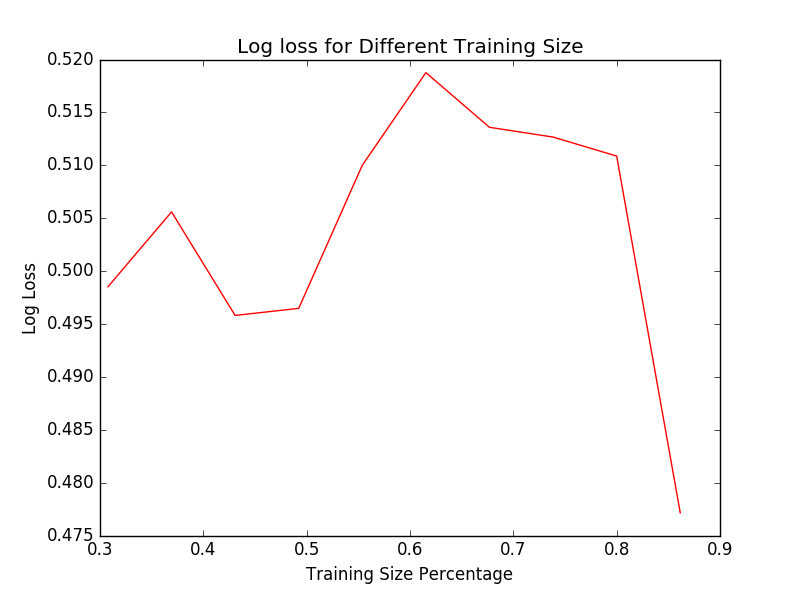

In [52]:
Image('figure_15.png')

In [ ]:
Pred_2015_GB = map(lambda x:x[1],GB.predict_proba(X_test_2015))

In [ ]:
ensemble= []
for i,v in zip(Pred_2015_GB,Pred_2015_RF):
    ensemble.append((i+v)/2) 
log_loss(Y_test_2015,ensemble)  

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'C':range(3245,3255,1) }
lr_grid = GridSearchCV(LogisticRegression(penalty='l2'), param_grid,cv=15,scoring ='log_loss')
lr_grid.fit(X_new_2015,Y_new_2015)
log_loss(Y_test_2015,lr_grid.predict_proba(X_test_2015))

In [28]:
from sklearn.ensemble import VotingClassifier
models = [('rf',forest_9_new),('GB',GB),('lr',lr_grid)]
ensemble = VotingClassifier(estimators = models,voting = 'soft')
ensemble.fit(X_new_2015,Y_new_2015)
log_loss(Y_test_2015,ensemble.predict_proba(X_test_2015))

0.44903189574385005

# Prediction for 2016 NCAA

In [13]:
forest_9_new = RandomForestClassifier(n_estimators = 300,max_features = 2,max_depth = None)
cv_new = cross_validation.ShuffleSplit(X_new.shape[0], n_iter=100,
                                   test_size=0.1, random_state=0)
scores_RF_9_new = cross_val_score(forest_9_new,X_new,Y_new,cv=cv_new,scoring = 'log_loss') ###tried cv=10: 0.788   
X_train = X_new.iloc[:820,:] # Training on the best pratition rate
Y_train = Y_new.iloc[:820,]
forest_9_new.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
scores_RF_9_new.mean()

-0.45564410872342337

In [ ]:
output_RF = map(lambda x:x[1],forest_9_new.predict_proba(test_final))
output_RF

In [ ]:
output = pd.DataFrame(data = [test_final.index.values,output_RF]).transpose()
output.columns = ['id','prob']
output = output.sort_values('id')
output.to_csv('ShooingStari.csv')
#output = pd.read_csv('ShootingStar.csv')
output.prob.hist()
plt.title('Predicted Prob Distribution')
plt.show()

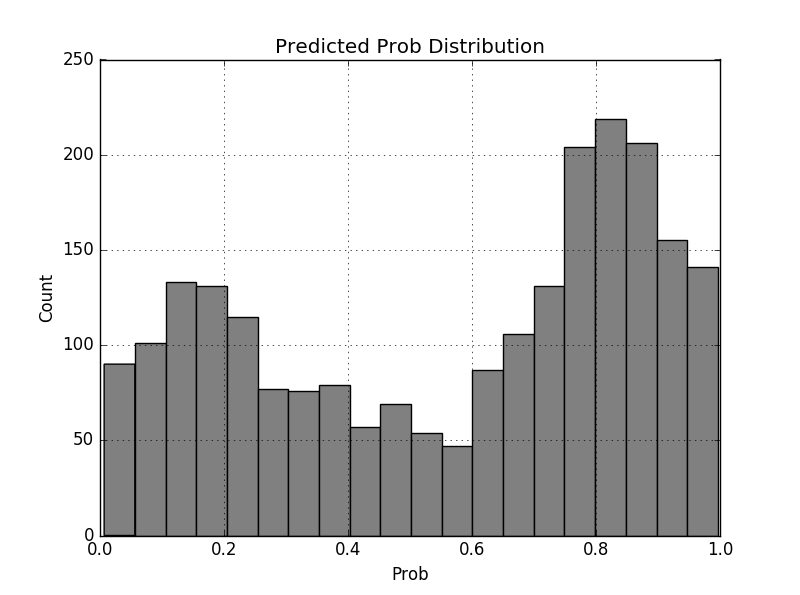

In [20]:
output = pd.read_csv('ShootingStar.csv')
output.prob.hist(bins = 20,color = 'grey')
plt.title('Predicted Prob Distribution')
plt.xlabel('Prob')
plt.ylabel('Count')
plt.show()
Image('figure_12.png')